In [56]:
#import necessary libraries 
#read the dataset

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools 

from scipy import stats
from scipy.stats import norm, sem, kurtosis

from statsmodels.stats.weightstats import ztest as ztest

from bioinfokit.analys import stat
from scipy.stats import f_oneway

#ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC

data = pd.read_csv("C:/Users/jband/Documents/Josh Masters/Statistics/CW/Dataset and code/exams.csv")

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,associate's degree,standard,completed,90,76,81
1,female,group D,some college,standard,none,61,60,65
2,female,group D,associate's degree,standard,none,81,92,93
3,female,group E,bachelor's degree,standard,completed,86,90,96
4,female,group E,associate's degree,free/reduced,none,37,49,48


In [57]:
#shape and column names 
print(f"{data.shape}")
print(f"{data.columns}")
print(f"{data.info()}")

#1000 observations and 8 features

(1000, 8)
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [58]:
#mean, std, min, max of the scores
print(f"{data.describe()}")

print(sem(data[['math score', 'reading score', 'writing score']]).mean())

        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.333000      69.046000      67.871000
std      15.523566      15.341422      15.926268
min      12.000000      15.000000      12.000000
25%      55.750000      59.000000      57.000000
50%      66.000000      69.000000      68.000000
75%      77.000000      80.000000      79.000000
max     100.000000     100.000000     100.000000
0.4932231444375919


In [59]:
#check if there is null

null = data.isnull().sum()

print(null)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [60]:
# we would need to add our output variable which is if the student has passed their tests 

#get the total score
data['Total Score'] = data['math score']+data['reading score']+data['writing score']

#create a function to apply to every student if they have passed or not
# the criteria will be if math, reading and writing scores are all above 40 then they pass
def result(math, reading, writing):
    if (math > 50 and reading > 50 and writing > 45):
        return 'P'
    else:
        return 'F'

In [61]:
# apply the function

data['Pass/Fail'] = data.apply(lambda x: result(x['math score'], 
                                                    x['reading score'], 
                                                    x['writing score']), axis = 1)

data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Pass/Fail
0,male,group D,associate's degree,standard,completed,90,76,81,247,P
1,female,group D,some college,standard,none,61,60,65,186,P
2,female,group D,associate's degree,standard,none,81,92,93,266,P
3,female,group E,bachelor's degree,standard,completed,86,90,96,272,P
4,female,group E,associate's degree,free/reduced,none,37,49,48,134,F
5,female,group D,bachelor's degree,free/reduced,completed,81,92,97,270,P
6,female,group C,some college,free/reduced,completed,36,60,55,151,F
7,male,group E,associate's degree,standard,none,90,83,77,250,P
8,female,group D,some college,standard,none,46,46,57,149,F
9,male,group C,some college,standard,none,49,47,42,138,F


Text(0.5, 1.0, 'Percentage of students that passed or failed')

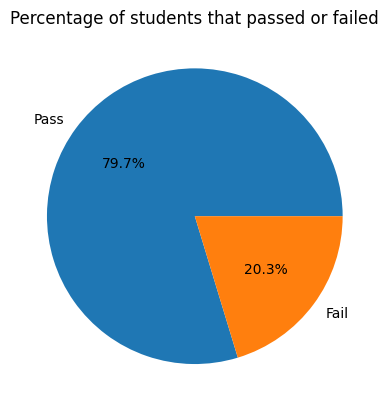

In [62]:
#check how many passed or failed

plt.pie(data['Pass/Fail'].value_counts(), labels=['Pass', 'Fail'], autopct='%1.1f%%')
plt.title('Percentage of students that passed or failed')


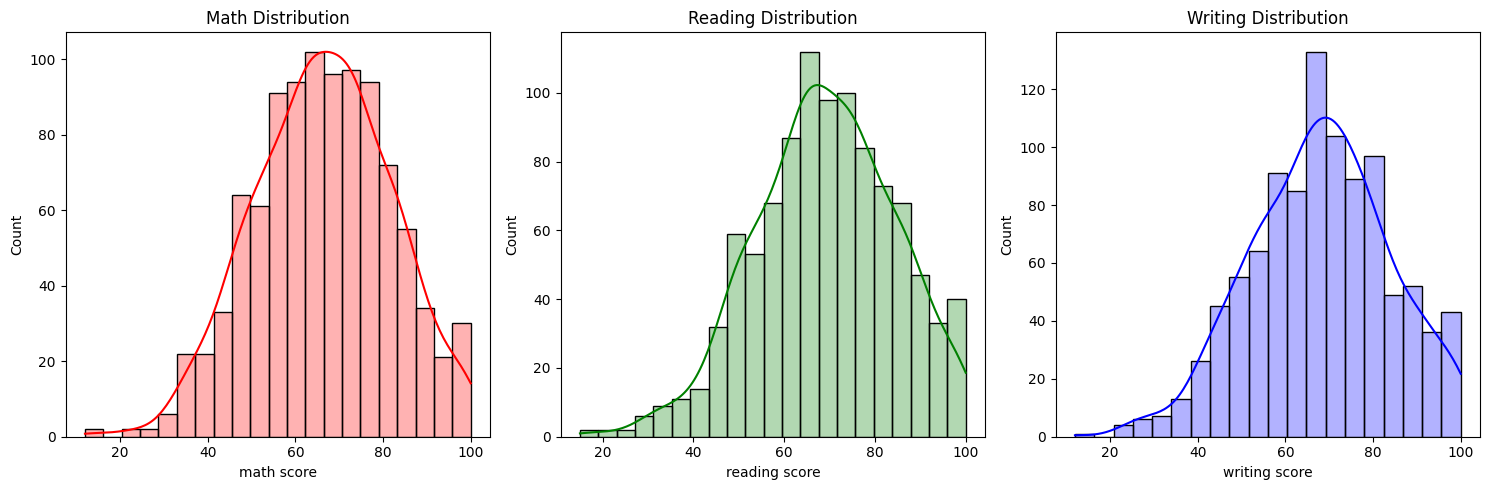

In [63]:
# check if the quantitive variables are normally distributed.

# plot a histogram for math, reading and writing scores

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 5))
sns.histplot(ax = ax1, data = data['math score'],
             kde = True, color = 'red', alpha = 0.3)
sns.histplot(ax = ax2, data = data['reading score'], 
             kde = True, color = 'green', alpha = 0.3)
sns.histplot(ax = ax3, data = data['writing score'], 
             kde = True, color = 'blue', alpha = 0.3)
ax1.set_title("Math Distribution")
ax2.set_title("Reading Distribution")
ax3.set_title("Writing Distribution")

fig.tight_layout()
plt.show()
    
# the kernel density function is used to create a curve of the distribution.
# from the graphs below we can depict that this is very close to a gaussian distribution 

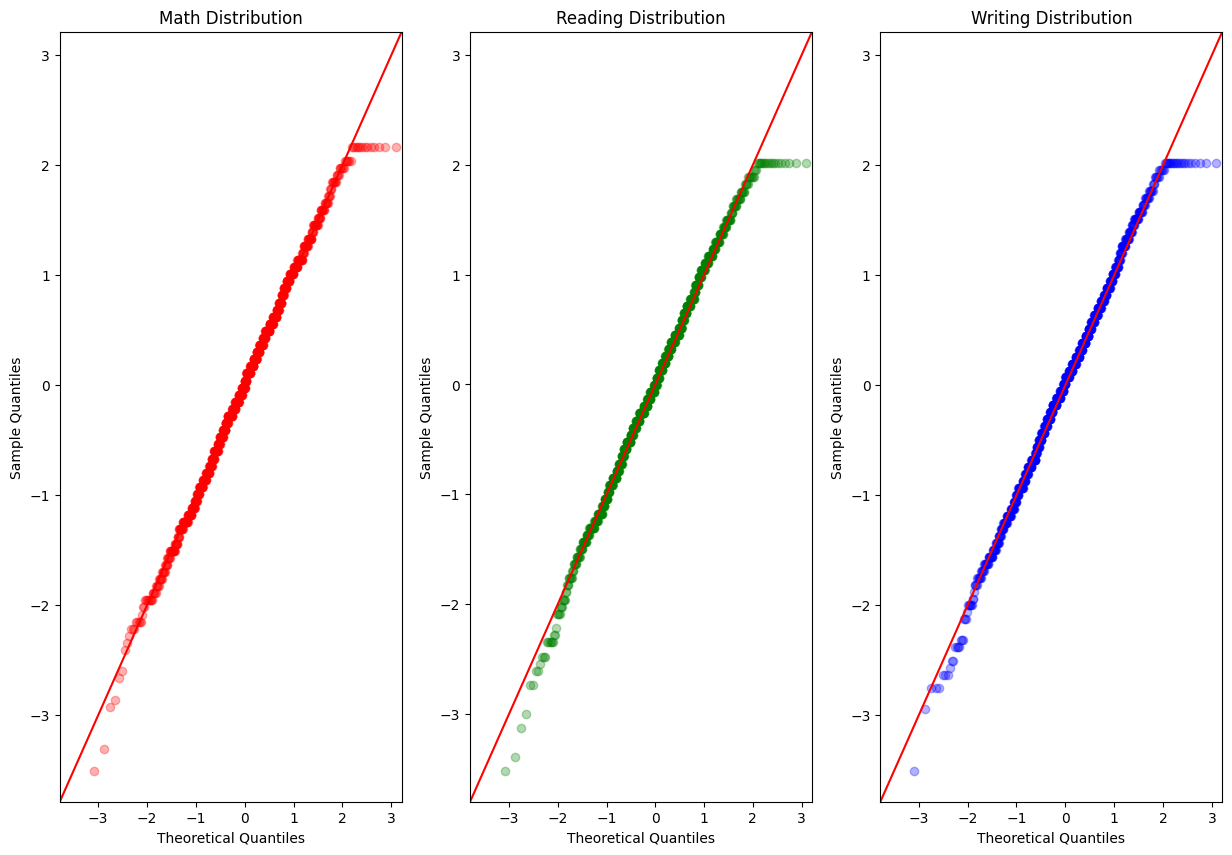

In [64]:
# check normality of residuals to see if data can be used for running a linear model.
    
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 10))
sm.qqplot(ax = ax1, data = data['math score'], markerfacecolor='red',
              markeredgecolor='red', line="45", fit=True, alpha=0.3)
sm.qqplot(ax = ax2, data = data['reading score'], markerfacecolor='green',
              markeredgecolor='green', line="45", fit=True, alpha=0.3)
sm.qqplot(ax = ax3, data = data['writing score'], markerfacecolor='blue',
              markeredgecolor='blue', line="45", fit=True, alpha=0.3)


ax1.set_title("Math Distribution")
ax2.set_title("Reading Distribution")
ax3.set_title("Writing Distribution")
plt.show()

# there exists correlation between student scores and the normal distribution line.
# this means that the data is very close to gaussian.

In [65]:
# check skewness for each test scores

test = []

for x in ['math score', 'reading score', 'writing score']:
    print(f"The skewness for {x} is {round(data[x].skew(), 3)}")
    test.append(data[x].skew())
    
test = np.array(test)
print(f"The skew mean for all three is: {round(test.mean(), 3)}")

The skewness for math score is -0.128
The skewness for reading score is -0.225
The skewness for writing score is -0.169
The skew mean for all three is: -0.174


In [66]:
#Use the kurtosis test to see the sharpness of the tails. 

test = []

for x in ['math score', 'reading score', 'writing score']:
    print(f"The kurtosis value for {x} is {kurtosis(data[x])}")
    test.append(kurtosis(data[x]))
    
test = np.array(test)
print(f"The mean kurtosis value for all test scores is {test.mean()}")
    
    
#Distributions with low kurtosis (thin tails) are platykurtic 
#(outlier frequency – low; a kurtosis of less than 3; 
#An excess kurtosis of less than 0)

#Kurtosis is a measure of whether the distribution is too peaked
#https://www.smartpls.com/documentation/functionalities/excess-kurtosis-and-skewness/

#https://www.smartpls.com/documentation/functionalities/excess-kurtosis-and-skewness/

The kurtosis value for math score is -0.2544228422532706
The kurtosis value for reading score is -0.12262748829536241
The kurtosis value for writing score is -0.20858452293173535
The mean kurtosis value for all test scores is -0.19521161782678945


C:\Users\jband\AppData\Local\Temp\ipykernel_4704\2251050114.py:22: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  scores = stats.norm.interval(alpha=0.95,


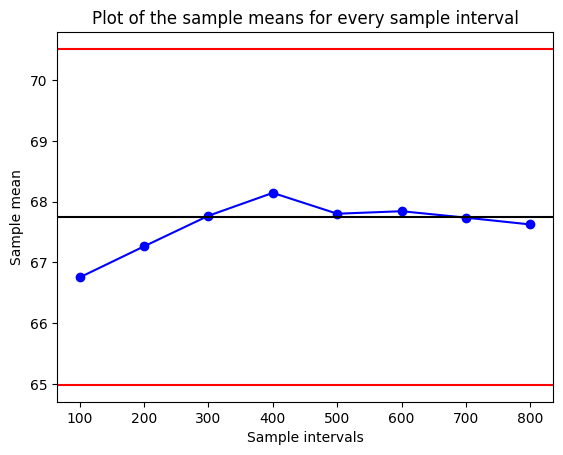

(64.9843188098143, 70.5156811901857)


In [67]:
# Check which sample sizes are most efficient by comparing sample sizes means

#https://www.qualtrics.com/uk/experience-management/research/determine-sample-size/?rid=ip&prevsite=en&newsite=uk&geo=GB&geomatch=uk

#reason: The size of the sample is very important for getting accurate, /
#statistically significant results and running your study successfully.

# the approach: find the mean for all the scores combined and find the 95% confidence interval / 
# plot a chart for all the sample sizes means and see which sample size mean is the closest to the 
# true mean
sample = [100,200,300,400,500,600,700,800] # the sample intervals

score_sample = [] # to hold the sample means for all the scores

scoreMean = data['Total Score'] / 3

#get the mean for each sample interval
for x in range(len(sample)):
    score_sample.append(scoreMean.sample(n=sample[x], random_state=2).mean())

# get the 95% confidence interval that the mean for all the scores falls within this range
scores = stats.norm.interval(alpha=0.95,
                    loc=np.mean(scoreMean),
                    scale=stats.sem(data['math score'] + data['reading score'] + data['writing score']))
    
plt.plot(sample, score_sample, 'bo' , linestyle='-')
plt.axhline(y=scores[0], color='r', linestyle='-')
plt.axhline(y=scores[1], color='r', linestyle='-')
plt.axhline(y=scoreMean.mean(), color='black', linestyle='-')
plt.title("Plot of the sample means for every sample interval")
plt.xlabel("Sample intervals")
plt.ylabel("Sample mean")
plt.show()

print(scores)

# from the results shown = 300 sample size seems appropriate as we don't want to sample a lot 


In [68]:
#using the same sample state as before, create a sample dictionary for the three scores 
sample_scores = {
    'math': data['math score'].sample(n=300, random_state=2),
    'reading': data['reading score'].sample(n=300, random_state=2),
    'writing': data['writing score'].sample(n=300, random_state=2),
    'total': data['Total Score'].sample(n=300, random_state=2)
}
sample_factors = {
    'gender': data['gender'].sample(n=300, random_state=2),
    'race/ethnicity': data['race/ethnicity'].sample(n=300, random_state=2),
    'parental level of education': data['parental level of education'].sample(n=300, random_state=2),
    'lunch': data['lunch'].sample(n=300, random_state=2),
    'test preparation course': data['test preparation course'].sample(n=300, random_state=2)
}

In [69]:
#perform a normality check using the shapiro wilk test to see if the sample comes from a normal distribution
#the H0 = the sample comes from a normal distribution / Ha = the sample is not normally distributed 
#the alhpa will be a = 0.05

test = stats.shapiro(sample_scores['total'])
    
print(f"The p value for Total Score is {round(test[1], 2)}")

The p value for Total Score is 0.03


In [70]:
# see if there's any correlation between the test scores 
# first check the numerical correlation difference between the two variables then visualise it
    
#numerical correlation using sample sizes (now that we can determine that sample sizes comes from a /
#normal distribution from the normality check)
for x in itertools.combinations(sample_scores.keys(), 2):
    print(f"The correlation between {x} is {sample_scores[x[0]].corr(sample_scores[x[1]])}")

#we can tell from this data that the scores are dependent on each other

The correlation between ('math', 'reading') is 0.8331814478360979
The correlation between ('math', 'writing') is 0.8183151640373608
The correlation between ('math', 'total') is 0.9225270027109914
The correlation between ('reading', 'writing') is 0.9541516976423776
The correlation between ('reading', 'total') is 0.9738533460902049
The correlation between ('writing', 'total') is 0.9690793264327466


In [71]:
print(list(itertools.combinations(sample_scores.keys(), 2)))

[('math', 'reading'), ('math', 'writing'), ('math', 'total'), ('reading', 'writing'), ('reading', 'total'), ('writing', 'total')]


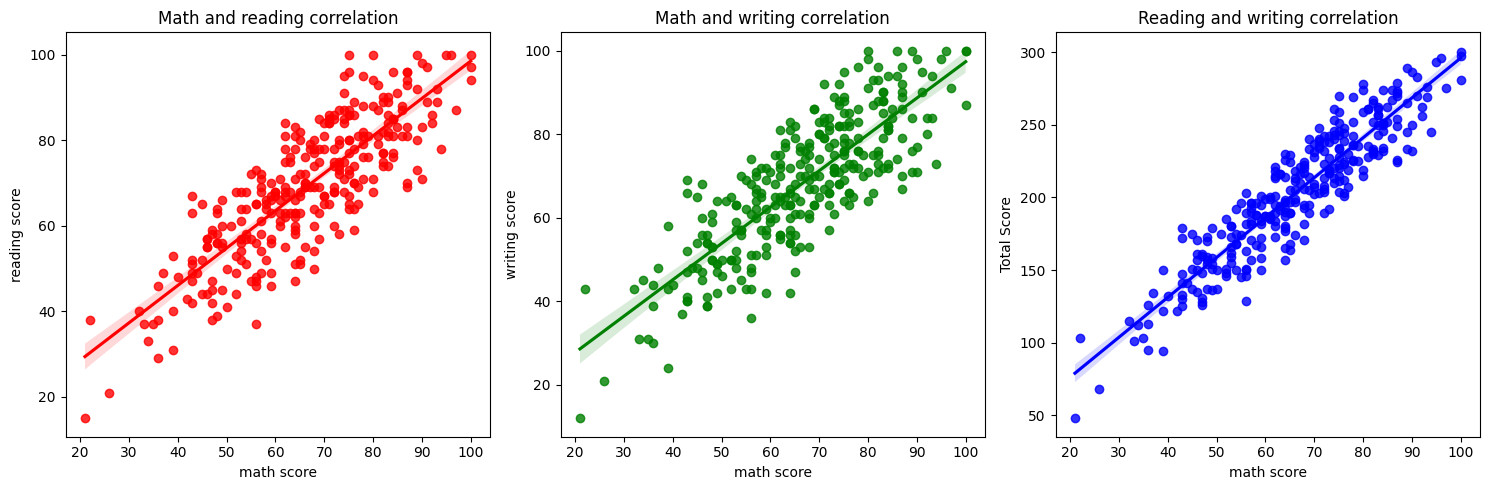

In [72]:
#time to visualise the correlation

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 5))

for x, col, ax in zip(itertools.combinations(sample_scores.keys(), 2), ['red', 'green', 'blue'], 
                 [ax1, ax2, ax3]):
    sns.regplot(ax = ax, x=sample_scores[x[0]], y=sample_scores[x[1]], color= col)
    
ax1.set_title("Math and reading correlation")
ax2.set_title("Math and writing correlation")
ax3.set_title("Reading and writing correlation")
plt.tight_layout()
plt.show()
    
#from the graph and results, we can conduct tests on the total scores instead of individual scores 

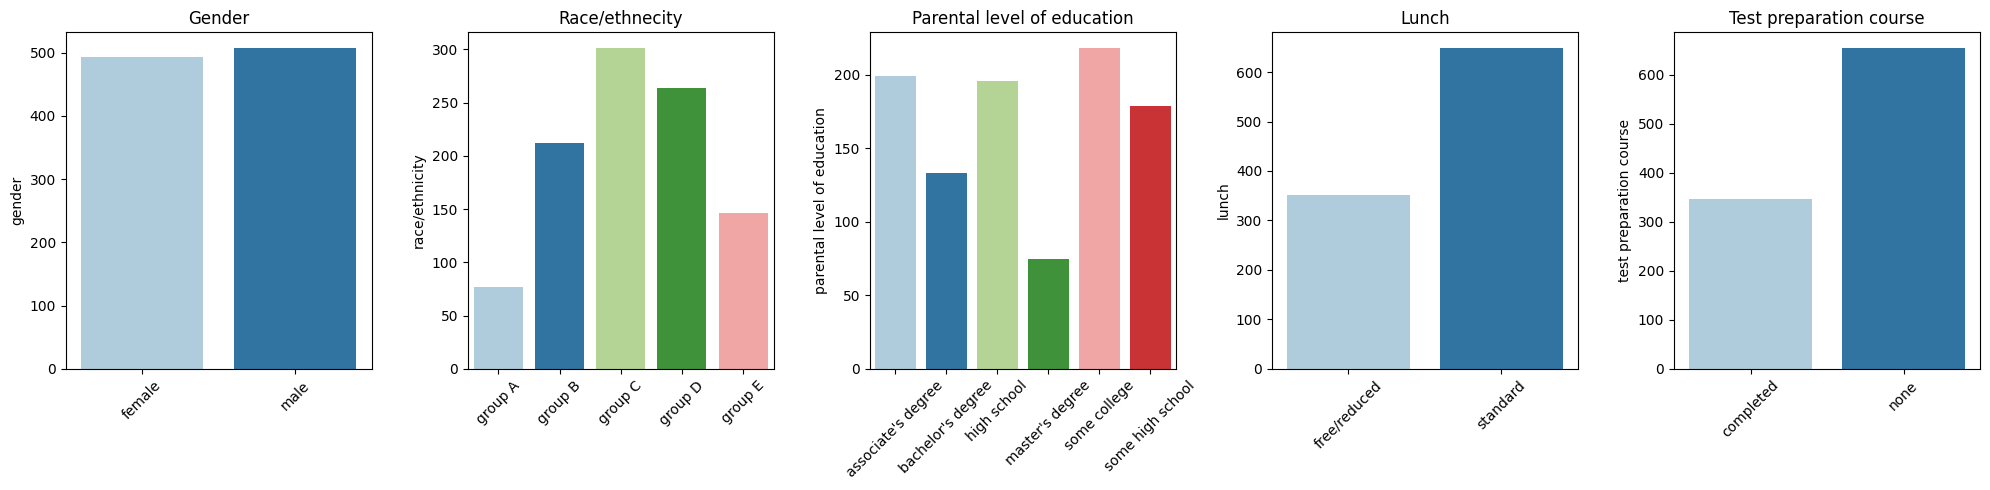

In [73]:
# plot the distribution for each categorical attributes in the dataset

#find the frequency distribution for categorical data 
#relative frequency

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20, 5))

for x, ax in zip(['gender', 'race/ethnicity', 'parental level of education', 
              'lunch', 'test preparation course'], [ax1,ax2,ax3,ax4,ax5]):
    test = data[x].value_counts().sort_index()
    bar = sns.barplot(ax = ax, x = test.index, y = test, palette="Paired")
    for item in bar.get_xticklabels():
        item.set_rotation(45)

ax1.set_title("Gender")
ax2.set_title("Race/ethnecity")
ax3.set_title("Parental level of education")
ax4.set_title("Lunch")
ax5.set_title("Test preparation course")

plt.tight_layout()
plt.show()
    
# 1 = around equal amount of male/female not too biased 
# 2 = the mode is group c
# 3 = there seems to be a significant difference between parents that have a bachelors or a masters.
# 4 = nearly double the amount of students that have standard lunch
# 5 = nearly double the amount of students that didn't revise

In [74]:
######### BREAK ########

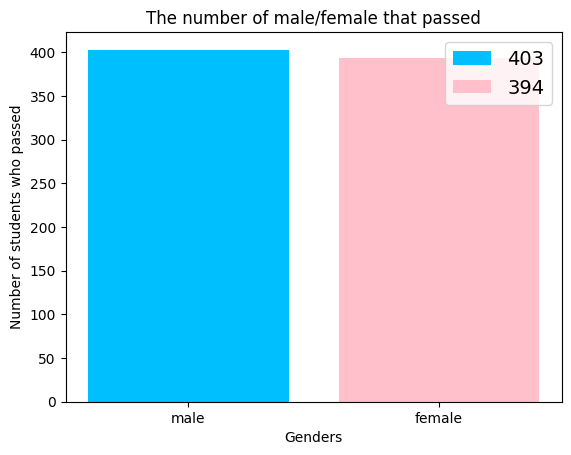

In [75]:
#hypothesis number 1: check if gender affects scores / both genders are nearly uniform 

gender = data['gender'].loc[data['Pass/Fail'] == 'P'].value_counts()

plt.bar(gender.index, gender, color=['deepskyblue', 'pink'], label=gender)
plt.xlabel("Genders")
plt.ylabel("Number of students who passed")
plt.title('The number of male/female that passed')
plt.legend(fontsize=14)

# we have determined that female students have performed relatively better than the female students

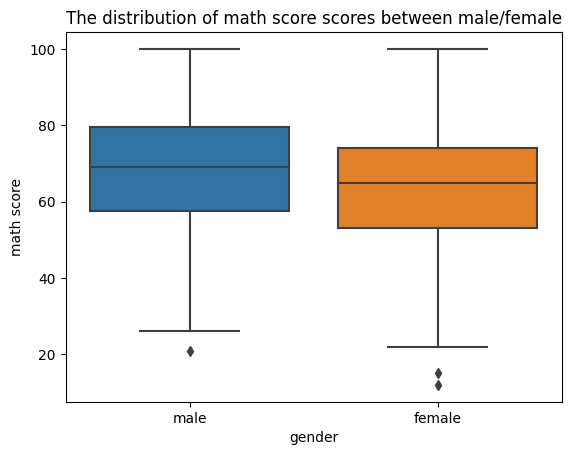

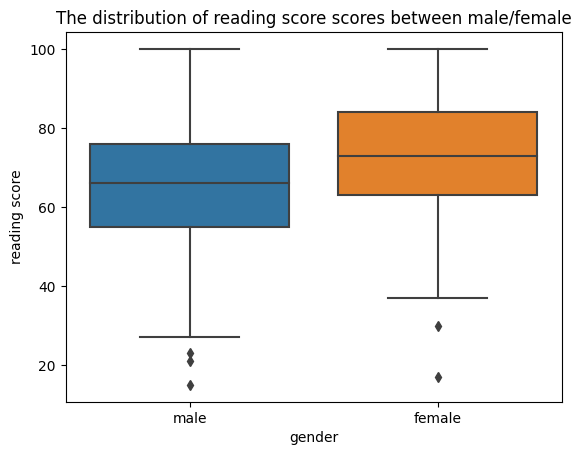

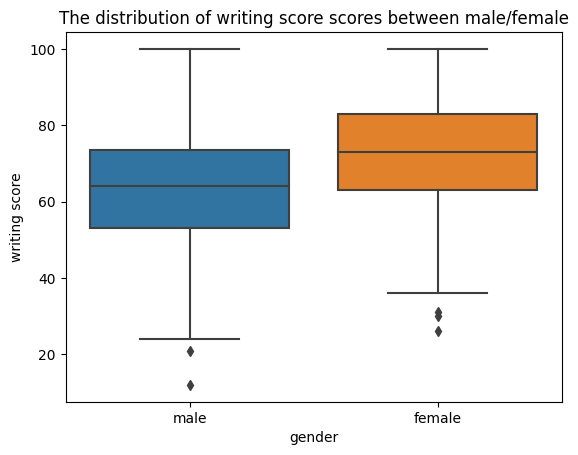

In [76]:
# next try to visualise how male differs from female in individual scores.

for x in ['math score', 'reading score', 'writing score']:
    sns.boxplot(x=data['gender'] , y = data[x])
    plt.title(f"The distribution of {x} scores between male/female")
    plt.show()

#from the box plots shown below, we can see that:
#math - male has a much higher median than female
#reading - female has a much higher median than male
#writing - female has a much higher median than male
# we can conclude that male does better numerically whereas female does better literacy.

In [77]:
#check the p-value using z test if p<a then reject null. a = 0.05
#null hypothesis = gender should have no difference to scores
#alternative = gender has a difference in scores

#collect 300 male and 300 female and calculate the differences between their total scores 

male = (data['Total Score']/3).loc[
    data['gender']=='male'].sample(n=300, random_state=2)
female = (data['Total Score']/3).loc[
    data['gender']=='female'].sample(n=300, random_state=2)

z = ztest(male,female, value = 0)

print(f"The p value is {round(z[1], 5)}")

The p value is 0.00015


In [78]:
######### BREAK ########

group C    235
group D    212
group B    165
group E    132
group A     53
Name: race/ethnicity, dtype: int64


Text(0, 0.5, 'Number of students')

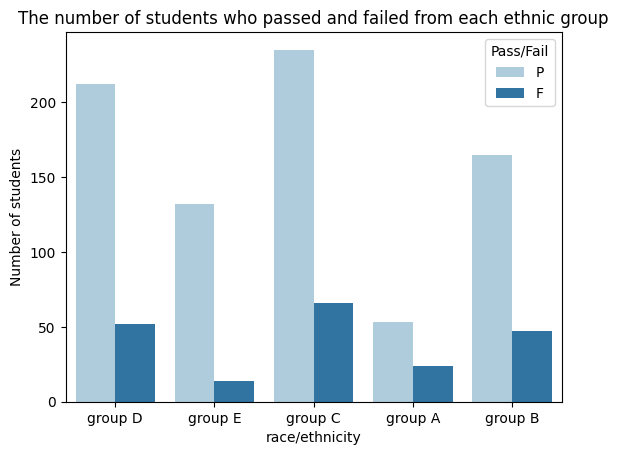

In [79]:
#hypothesis number 2: check if being a certain race/ethnicity affects scores  

ethnic = data['race/ethnicity'].loc[data['Pass/Fail'] == 'P'].value_counts()

print(ethnic)

sns.countplot(x = data['race/ethnicity'], hue = data['Pass/Fail'], palette='Paired')
plt.title('The number of students who passed and failed from each ethnic group')
plt.ylabel('Number of students')

In [80]:
#find out the pass to fail ratio

for x in ['group A', 'group B', 'group C', 'group D', 'group E']:
    
    t = data['Pass/Fail'].loc[data['race/ethnicity']==x].value_counts()
    print(f"The pass to fail ratio for {x} is {round(abs(t[0] / t[1]))}:1")
    
#from the results below, group E has a much higher pass to fail ratio than the other groups
#as there are 35 students who pass before a student fails
#this suggests that group e students are significantly smarter than the rest

The pass to fail ratio for group A is 2:1
The pass to fail ratio for group B is 4:1
The pass to fail ratio for group C is 4:1
The pass to fail ratio for group D is 4:1
The pass to fail ratio for group E is 9:1


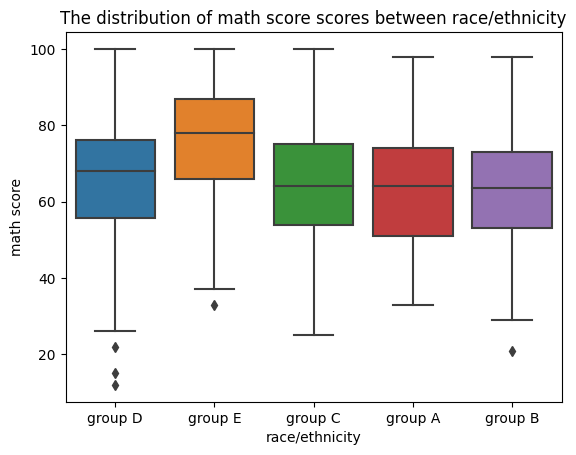

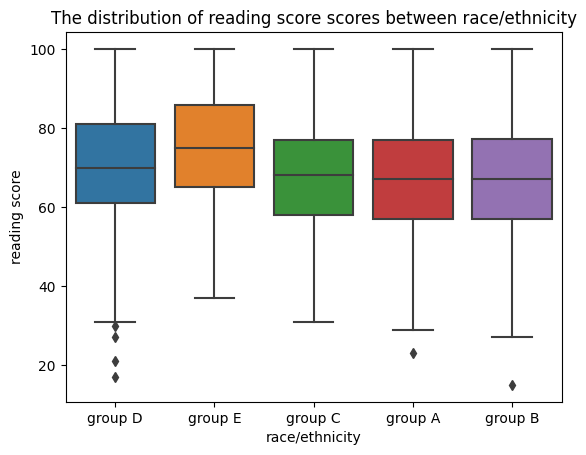

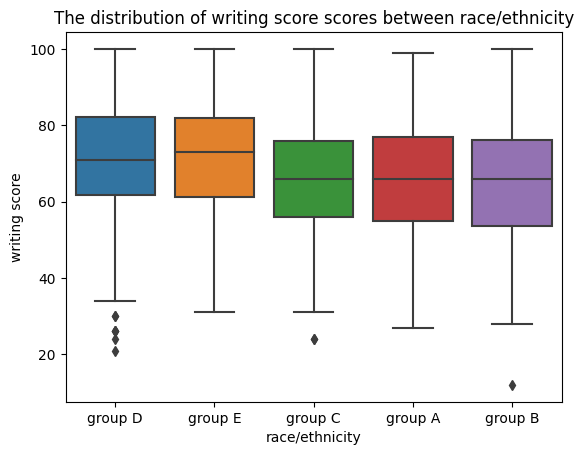

In [81]:
# visualise how race/ethnicity differs for each test

for x in ['math score', 'reading score', 'writing score']:
    sns.boxplot(x=data['race/ethnicity'] , y = data[x])
    plt.title(f"The distribution of {x} scores between race/ethnicity")
    plt.show()
    
#we can conclude that group E has the higher mean scores for all three tests

In [82]:
#From the visualisations and results before, since there is a significant difference of scores
#from group E compared to the rest we can from a hypothesis

# h0 = race/ethnicity does not play a significant difference to student scores
# hA = race/ethnicity does play a significant difference to student scores 

#approach - perform a one way anova test since there is only one independent variable (race/ethnicity)
#and take 300 samples from the population with 60 of each race == 300

##https://www.scribbr.com/statistics/one-way-anova/

groupA = (data['Total Score']/3).loc[data['race/ethnicity']=='group A'].sample(n=60, random_state=2)
groupB = (data['Total Score']/3).loc[data['race/ethnicity']=='group B'].sample(n=60, random_state=2)
groupC = (data['Total Score']/3).loc[data['race/ethnicity']=='group C'].sample(n=60, random_state=2)
groupD = (data['Total Score']/3).loc[data['race/ethnicity']=='group D'].sample(n=60, random_state=2)
groupE = (data['Total Score']/3).loc[data['race/ethnicity']=='group E'].sample(n=60, random_state=2)

anova = f_oneway(groupA,groupB,groupC,groupD,groupE)

print(f"The p value is {anova[1]:.7f}")

The p value is 0.0000004


In [83]:
######### BREAK ########

some college          179
associate's degree    164
high school           142
some high school      126
bachelor's degree     115
master's degree        71
Name: parental level of education, dtype: int64


Text(0, 0.5, 'Number of students')

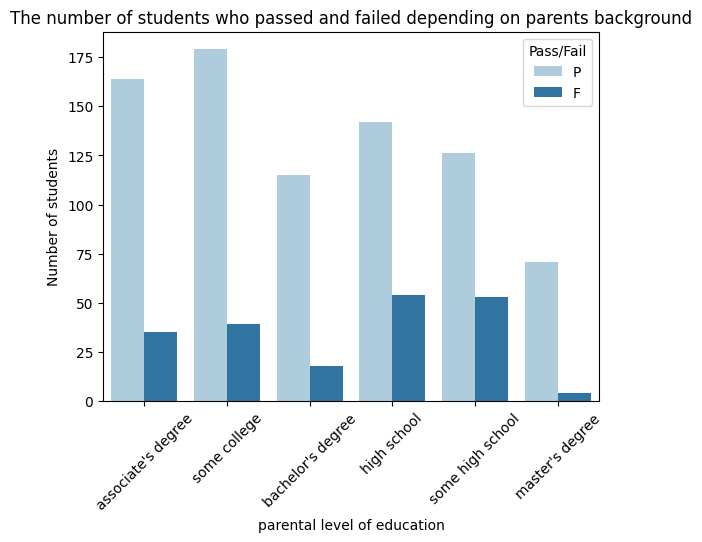

In [84]:
# hypthesis number 3: does a parent's educational background have an impact on the student's score?

parents = data['parental level of education'].loc[data['Pass/Fail'] == 'P'].value_counts()

print(parents)

chart =sns.countplot(x = data['parental level of education'], hue = data['Pass/Fail'], palette='Paired')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('The number of students who passed and failed depending on parents background')
plt.ylabel('Number of students')

In [85]:
#find the pass to fail percentage for parents background

for x in ["associate's degree", 'some college', "bachelor's degree",
          'high school', 'some high school', "master's degree"]:
    t = data['Pass/Fail'].loc[data['parental level of education']==x].value_counts().reindex(
                                                    data['Pass/Fail'].unique(),fill_value=0)
    
    percentage = data['Pass/Fail'].loc[data['parental level of education']==x].value_counts() / \
         data['Pass/Fail'].loc[data['parental level of education']==x].value_counts().sum() * 100
    
    print(f"The pass percentage for {x} is {round(percentage[0], 1)}")
        
#We can see from the results below that parent's with a masters or a bachelor's degree had a much higher
#pass percentage rate for students than among other educational backgrounds.

The pass percentage for associate's degree is 82.4
The pass percentage for some college is 82.1
The pass percentage for bachelor's degree is 86.5
The pass percentage for high school is 72.4
The pass percentage for some high school is 70.4
The pass percentage for master's degree is 94.7


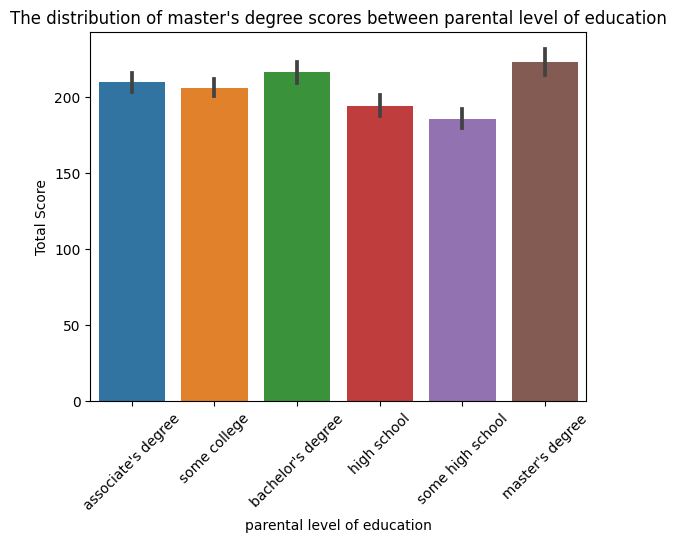

In [86]:
#visualise how each educational background differs a student's total scores

chart = sns.barplot(x=data['parental level of education'],y=data['Total Score'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title(f"The distribution of {x} scores between parental level of education")
plt.show()

#we can see from the graph below that masters and bachelors degree have a significant difference 
#among other parents with difference educational background

In [87]:
# from the results and graph above, we can assume that a parent's level of education affects student grades
# we can now test this using a hypothesis test of anova 

#h0 = there is no significant difference for total scores between the parental level of education
#hA = there is a significant difference for total scores between the parental level of education
#a = 0.05

#have equal samples for each group to add up to 300

associate = (data['Total Score']/3).loc[data['parental level of education']=="associate's degree"
                                       ].sample(n=50, random_state=2)
someCollege = (data['Total Score']/3).loc[data['parental level of education']=='some college'
                                         ].sample(n=50, random_state=2)
bachelor = (data['Total Score']/3).loc[data['parental level of education']=="bachelor's degree"
                                      ].sample(n=50, random_state=2)
highSchool = (data['Total Score']/3).loc[data['parental level of education']=='high school'
                                        ].sample(n=50, random_state=2)
someHighSchool = (data['Total Score']/3).loc[data['parental level of education']=='some high school'
                                            ].sample(n=50, random_state=2)
master = (data['Total Score']/3).loc[data['parental level of education']=="master's degree"
                                    ].sample(n=50, random_state=2)

anova = f_oneway(associate,someCollege,bachelor,
         highSchool,someHighSchool,master)

print(f"The p value is {anova[1]:.7f}")

The p value is 0.0004045


In [88]:
### just in case - this cell is used to test the hypothesis that there is no difference between
# the sample means(a) to the population mean(b)

a = pd.concat([associate,someCollege,bachelor,highSchool,someHighSchool,master])
     
b = scoreMean

ztest(a,b, value = 0)

(-0.09081417488784763, 0.9276402466628311)

In [89]:
######### BREAK ########

Text(0, 0.5, 'Number of students')

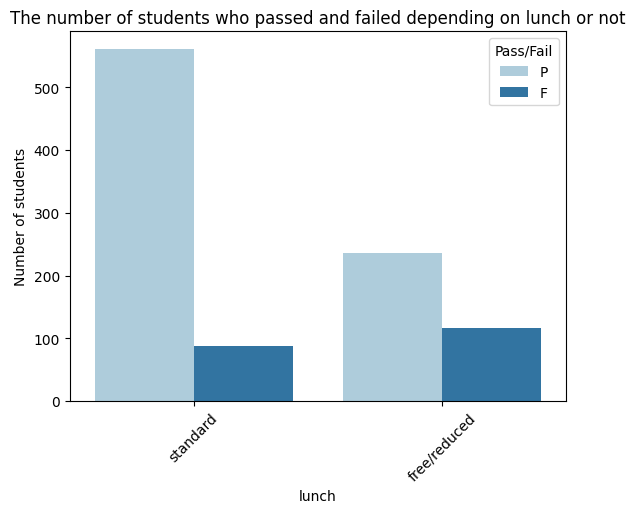

In [90]:
# hypothesis number 4: Does lunch have an effect in student's scores?

#first check how many students that had lunch passed?

chart = sns.countplot(x = data['lunch'], hue = data['Pass/Fail'], palette='Paired')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('The number of students who passed and failed depending on lunch or not')
plt.ylabel('Number of students')

In [91]:
# check the ratio for the graph above

for x in ['standard', 'free/reduced']:
    t = data['Pass/Fail'].loc[data['lunch']==x].value_counts()
    print(f"The pass to fail ratio for {x} is {round(abs(t[0] / t[1]))}:1")
    
# here we can assume that lunch will have an impact on student's scores
# this is because a student who has 'standard' lunch are 5 times more likely to pass
# compared to eating 'free/reduced'

The pass to fail ratio for standard is 6:1
The pass to fail ratio for free/reduced is 2:1


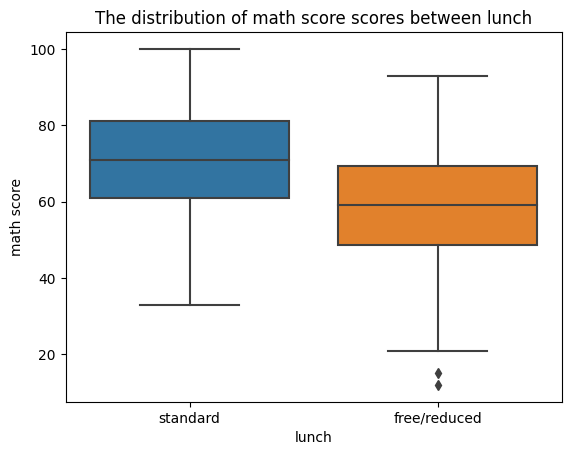

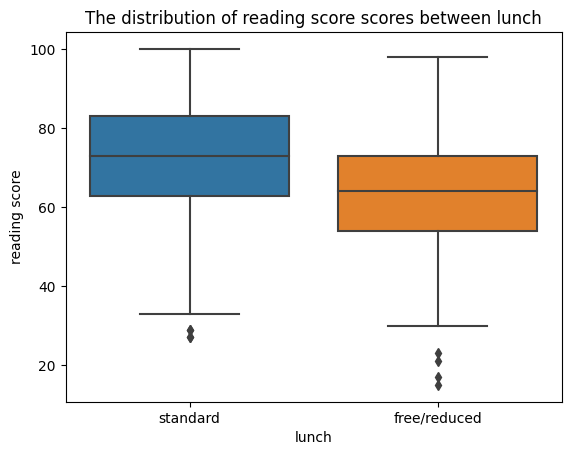

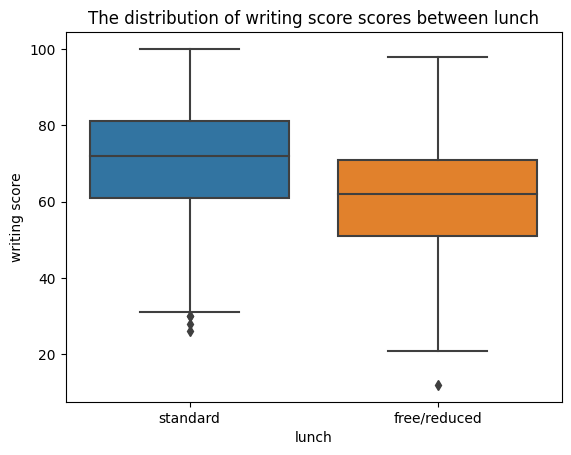

In [92]:
# we can visualise how 'standard' and 'free/reduced' lunch affects student's scores

for x in ['math score', 'reading score', 'writing score']:
    sns.boxplot(x=data['lunch'] , y = data[x])
    plt.title(f"The distribution of {x} scores between lunch")
    plt.show()
    
# the mean for 'standard' is much on all the tests compared to 'free/reduced'

In [93]:
# perform a two-sample z test to compare the mean for 'lunch' and 'free/reduced'

#the h0 = there is no difference in scores regardless of lunch
#the hA = there is a difference in scores depending on the student's type of lunch
#the a = 0.05
#if p < a then reject the null and accept the alternative
#if p > a then we fail to reject the null 

#collect 300 samples for each group 

standard = (data['Total Score']/3).loc[data[
    'lunch']=='standard'].sample(n=300, random_state=2)
free = (data['Total Score']/3).loc[data[
    'lunch']=='free/reduced'].sample(n=300, random_state=2)

t = ztest(standard,free, value = 0)
print(f"The p-value for lunch is {t[1]:.17f}")

The p-value for lunch is 0.00000000000000001


In [94]:
######### BREAK ########

Text(0, 0.5, 'Number of students')

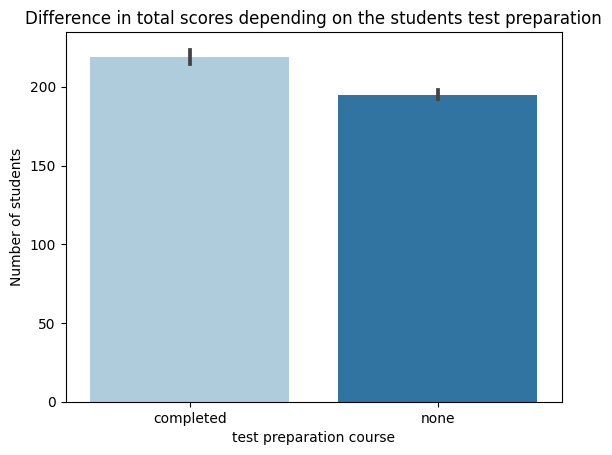

In [95]:
# hypothesis number 5: test the effectiveness in test preparation courses 

# check the difference in total score between the two

chart = sns.barplot(x = data['test preparation course'], y=data[
    'Total Score'], palette='Paired')
plt.title('Difference in total scores depending on the students test preparation')
plt.ylabel('Number of students')

# the results show that students who completed the course got a higher score

In [96]:
#check the pass percentage for students who completed and didn't complete the course

for x in ['completed', 'none']:    
    percentage = data['Pass/Fail'].loc[data['test preparation course']==x].value_counts() / \
         data['Pass/Fail'].loc[data['test preparation course']==x].value_counts().sum() * 100
    
    print(f"The pass percentage for {x} is {round(percentage[0], 1)}")
    
#the results show that student's who completed the course is 4.0% more likely to pass than
#not completing the course

#we can make an assumption from the population that there is a difference between the 
#score mean for students who completed the course and didn't 

#although evidently it shows that the course is increasing student's scores, it is not as effective
#as it should be with only a 4% increase?

The pass percentage for completed is 85.8
The pass percentage for none is 76.5


In [97]:
# complete a two sample z test to complete the hypothesis testing 

# the h0 = there is no significant difference between total scores for completing the course
# the hA = there is a significant difference between total scores for completing the course 
# the a = 0.05
# if p<a then reject null
# if p>a then fail to reject null 

#collect 300 samples from each 
completed = (data['Total Score']/3).loc[data[
    'test preparation course']=='completed'].sample(n=300, random_state=2)
no = (data['Total Score']/3).loc[data[
    'test preparation course']=='none'].sample(n=300, random_state=2)

t = ztest(completed,no, value = 0)

print(f"The p-value for the test prep is {t[1]:.12f}")

The p-value for the test prep is 0.000000000005


In [98]:
######### BREAK ########

In [99]:
#As we have analysed from the previous hypothesis testing, we can conclude that 
#gender, race/ethnicity, parental level of education, lunch and test preparation course 
#has a significant impact towards the student's overall scores. 

In [100]:
#train a model using multiple logistic regression.

X = data[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]

X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,male,group D,associate's degree,standard,completed
1,female,group D,some college,standard,none
2,female,group D,associate's degree,standard,none
3,female,group E,bachelor's degree,standard,completed
4,female,group E,associate's degree,free/reduced,none


In [101]:
#scale the continious variables 

data_X = round((data[['Total Score']] / 3),2) 

print(data_X)
print(data_X.describe())

scaler = preprocessing.StandardScaler().fit(data_X)
X_scaled = scaler.transform(data_X)

#convert X_scaled to dataframe
X_scaled = pd.DataFrame(X_scaled, columns=['Total Score'])

X_scaled

     Total Score
0          82.33
1          62.00
2          88.67
3          90.67
4          44.67
..           ...
995        69.67
996        45.00
997        71.67
998        52.33
999        46.67

[1000 rows x 1 columns]
       Total Score
count  1000.000000
mean     67.749950
std      14.873982
min      16.000000
25%      57.670000
50%      68.000000
75%      78.000000
max     100.000000


,Total Score
0,0.980729
1,-0.386771
2,1.407190
3,1.541720
4,-1.552476
...,...
995,0.129152
996,-1.530278
997,0.263683
998,-1.037225


In [102]:
#apply dummy coding to change the independent variables to numbers where the model can understand 

category = data[['gender', 'race/ethnicity', 'parental level of education', 
                 'lunch', 'test preparation course']]

#create dummy variables for each categorical data
#drop first is used to reduce the amount of features, eg, when group b,c,d and e is 0 then 
#it is obviously going to be group a

gender_num = pd.get_dummies(data['gender'], drop_first=True).reset_index(drop=True)
ethnicity_num = pd.get_dummies(data['race/ethnicity'], drop_first=True).reset_index(drop=True)
education_num = pd.get_dummies(data['parental level of education'], drop_first=True).reset_index(drop=True)
lunch_num = pd.get_dummies(data['lunch'], drop_first=True).reset_index(drop=True)
prep_num = pd.get_dummies(data['test preparation course'], drop_first=True).reset_index(drop=True)

dummyData = pd.concat([gender_num, ethnicity_num, education_num, lunch_num, prep_num, 
                    #X_scaled
                      ], axis=1)

dummyData = dummyData.dropna()

dummyData.head()


,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,1,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,1,1
2,0,0,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,1,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,1


In [103]:
# change the outcome variable to 1 and 0 using map 

Y = data['Pass/Fail'].map({'P': 1, 'F': 0})


In [104]:
# now that we have transformed all categorical data into numerical
# we can now split the data into train and test 

X_train, X_test, Y_train, Y_test = train_test_split(dummyData, Y,
                                                   train_size = 0.7, test_size = 0.3, random_state=2)

print(X_train, Y_train)



# from previous research we have concluded to use 300 observations out of 1000.

     male  group B  group C  group D  group E  bachelor's degree  high school  \
90      1        0        1        0        0                  1            0   
305     1        0        0        0        1                  0            0   
126     0        0        1        0        0                  1            0   
963     0        0        0        1        0                  0            0   
163     1        0        0        1        0                  1            0   
..    ...      ...      ...      ...      ...                ...          ...   
534     0        0        1        0        0                  0            0   
584     1        1        0        0        0                  0            0   
493     0        1        0        0        0                  0            0   
527     1        0        1        0        0                  0            0   
168     0        0        0        0        1                  0            1   

     master's degree  some 

In [105]:
# Test different classification models 

# Logisitc regression
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,Y_train)

logistic_proba = (modelLogistic.predict_proba(X_test)[::,1])
logistic_pred = (modelLogistic.predict_proba(X_test)[::,1] >= 0.7).astype(bool)

logistic_pred[:50]

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True])

In [106]:
#Decision tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

tree_proba = (decision_tree.predict_proba(X_test)[::,1])
tree_pred = decision_tree.predict(X_test)

In [107]:
# SVM 

svc = SVC(probability=True)
svc.fit(X_train, Y_train)

svc_proba = svc.predict_proba(X_test)[::,1]
svc_pred = svc.predict(X_test)

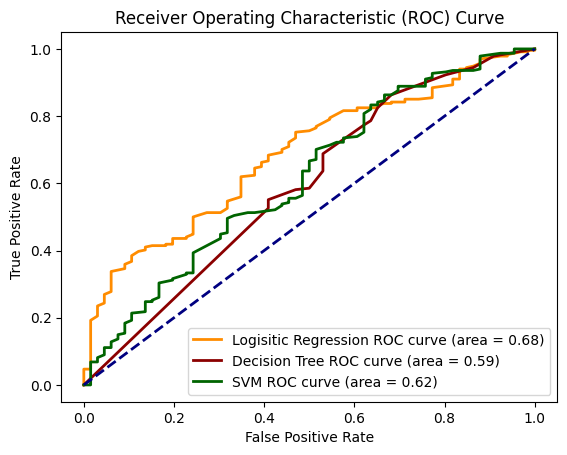

In [108]:
#Logistic proba
fpr, tpr, _ = metrics.roc_curve(Y_test,  logistic_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='Logisitic Regression ROC curve (area = %0.2f)' % roc_auc)

#decision tree proba
fpr, tpr, _ = metrics.roc_curve(Y_test,  tree_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkred', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc)

#decision tree proba
fpr, tpr, _ = metrics.roc_curve(Y_test,  svc_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc)

# Plotting the ROC curve

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[[ 23  43]
 [ 39 195]]


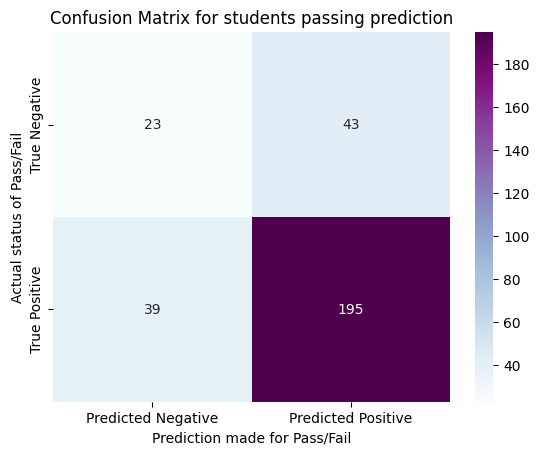

In [129]:
ConfusionMatrix = confusion_matrix(Y_test, logistic_pred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu', fmt='g')
ax.set_title('Confusion Matrix for students passing prediction');
ax.set_xlabel('Prediction made for Pass/Fail')
ax.set_ylabel('Actual status of Pass/Fail');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['Predicted Negative','Predicted Positive'])
ax.yaxis.set_ticklabels(['True Negative','True Positive'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [131]:
# using the values in the confusion matrix we can calculate various performance metrics: 
#Accuracy = (TP + TN) / (TP + FP + TN + FN)
#Precision = TP / (TP + FP)
#Recall = TP / (TP + FN)
#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

print(classification_report(Y_test, tree_pred))

#the overall model accuracy is 97% 

              precision    recall  f1-score   support

           0       0.40      0.32      0.35        66
           1       0.82      0.86      0.84       234

    accuracy                           0.74       300
   macro avg       0.61      0.59      0.60       300
weighted avg       0.73      0.74      0.73       300



The mean score for a 10-fold cross validation on the model is 78.3%


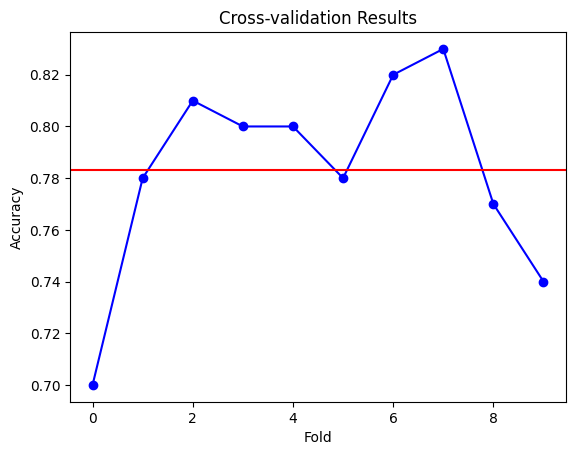

In [111]:
scores = cross_val_score(modelLogistic, dummyData, Y, cv=10)

print(f"The mean score for a 10-fold cross validation on the model is {round(scores.mean(), 3)*100}%")

plt.plot(scores, 'bo', linestyle= '-')
plt.title('Cross-validation Results')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.axhline(y=scores.mean(), color='r')
plt.show()

In [112]:
#obtain the regression co efficients 

X_train2 = sm.add_constant(X_train)
logit_model = sm.Logit(Y_train,X_train2)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.421481
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Pass/Fail   No. Observations:                  700
Model:                          Logit   Df Residuals:                      687
Method:                           MLE   Df Model:                           12
Date:                Sun, 27 Aug 2023   Pseudo R-squ.:                  0.1475
Time:                        02:04:56   Log-Likelihood:                -295.04
converged:                       True   LL-Null:                       -346.08
Covariance Type:            nonrobust   LLR p-value:                 2.165e-16
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3648      0.468      0.780      0.435      -0.552       1.282
male    

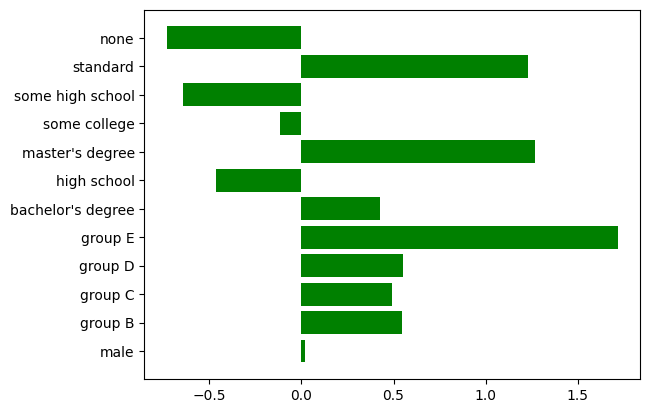

In [113]:
#visualise which features are most important using co efficient  

test = modelLogistic.coef_.flatten()
plt.barh(dummyData.columns, test, color = "g")
plt.show()

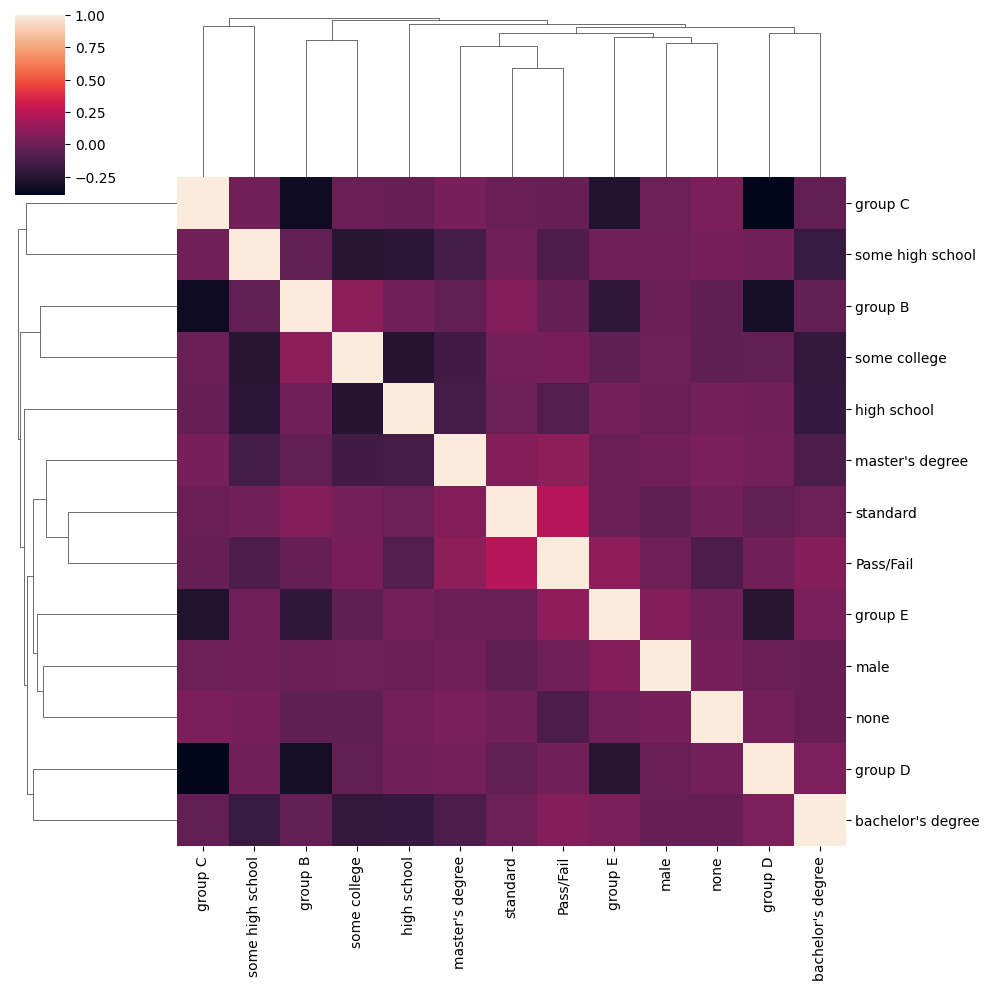

In [114]:
test = pd.concat([dummyData, Y
                      ], axis=1)

sns.clustermap(test.corr())